In [121]:
from sklearn.manifold import TSNE
from gensim.models.doc2vec import Doc2Vec
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# T-SNE
이 파일은 만들어진 모델을 T-SNE을 사용하여 2차원으로 표현한다.
참고: https://ko.wikipedia.org/wiki/T-분포_확률적_임베딩  

N차원으로 된 벡터를 2차원으로 차원 축소를 시킨다.
비슷한 벡터끼리는 가깝게, 다른 벡터는 상대적으로 멀게 표현된다.
매번 값이 바뀌는 특성을 가지고 있다. 
이 때문에 실제로 머신러닝 모델에 적용하기는 힘들지만 참고는 할 수 있다.

In [27]:
model_name = 'dynamic_analysis/Doc2vec_model_vector30_window15_dm0' #저장한 Doc2vec 모델을 불러온다.
model = Doc2Vec.load(model_name)

# 1. 문서간의 관계를 T-SNE로 표현
여기서는 malware과 software의 관계를 표현하였다.

In [29]:
tags = list(model.docvecs.doctags.keys())#model에서 tag 정보를 가져온다.

In [30]:
len(tags)

8863

In [31]:
tags[0]

'software_0'

In [32]:
#가져온 태그 정보를 이용하여 model에서 악성코드와 소프트웨어의 위치 값을 가져온다.
software_idx = []
malware_idx = []
for i, tag in enumerate(tags):
    if tag.split('_')[0] == 'software':#"software_" 로 시작되는 태그 추출
        software_idx.append(i)#software의 배열 위치를 저장.
    if tag.split('_')[0] == 'malware':#"malware_" 로 시작되는 태그 추출
        malware_idx.append(i)#malware의 배열 위치를 저장.

In [33]:
len(software_idx)

2807

In [34]:
len(malware_idx)

6056

In [35]:
model.docvecs.vectors_docs[0]#model.docvecs.doctag_syn0 안에는 각 API 시퀀스를 vector 로 변환시킨 데이터가 들어가 있다.

array([-0.04750879,  0.54937816,  0.29126343, -0.72962934,  0.18855713,
       -0.52289975, -0.12340409,  0.23926736,  0.4020555 ,  0.47356707,
        0.33104348, -0.3402184 , -0.45358893,  0.5310426 , -0.11155209,
        0.4275416 , -0.6089715 ,  0.02444598,  0.3610221 ,  0.45330715,
       -0.72498715,  0.30071104,  0.09945086,  0.7093886 , -0.44906402,
        0.00444833, -0.28793186, -0.51262945, -0.21599379, -0.28049853,
       -0.2842514 , -0.1621473 , -1.0494134 ,  0.5359415 ,  0.47055924,
        0.18632779, -0.1671913 , -0.3725343 , -0.05615758,  0.29625002,
       -0.26285332,  0.07171399,  0.33930263,  0.23046392, -0.14256321,
       -0.23136593,  0.17002025,  0.44687736,  0.01924895, -0.23204952],
      dtype=float32)

In [36]:
#많은 시간이 소요된다.
tsne = TSNE(n_components=2).fit(model.docvecs.vectors_docs)# n_components 차원 수 설정.
datapoint = tsne.fit_transform(model.docvecs.vectors_docs)#벡터화된 데이터들을 2차원으로 변환시킨 후 datapoint에 저장한다.

In [37]:
datapoint[0]#2차원으로 변환 된 것을 확인 할 수 있다.

array([69.18843, 26.57991], dtype=float32)

In [73]:
fig = plt.figure()#그림 생성

<Figure size 432x288 with 0 Axes>

In [74]:
fig.set_size_inches(40, 20)# 크기 셋팅

In [75]:
ax = fig.add_subplot(1, 1, 1) # 1X1 그리드에 1번째 subplot 생성

In [76]:
#subplot ax에 악성코드 그리기. datapoint[malware_idx,0] x좌표,  datapoint[malware_idx,1] y 좌표, 색깔은 Red
ax.scatter(datapoint[malware_idx,0], datapoint[malware_idx,1],c='r')

In [77]:
#subplot ax에 소프트웨어 그리기. datapoint[software_idx,0] x좌표,  datapoint[software_idx,1] y 좌표, 색깔은 Red
ax.scatter(datapoint[software_idx,0], datapoint[software_idx,1],c='b')

In [82]:
fig.savefig(model_name+'.png')

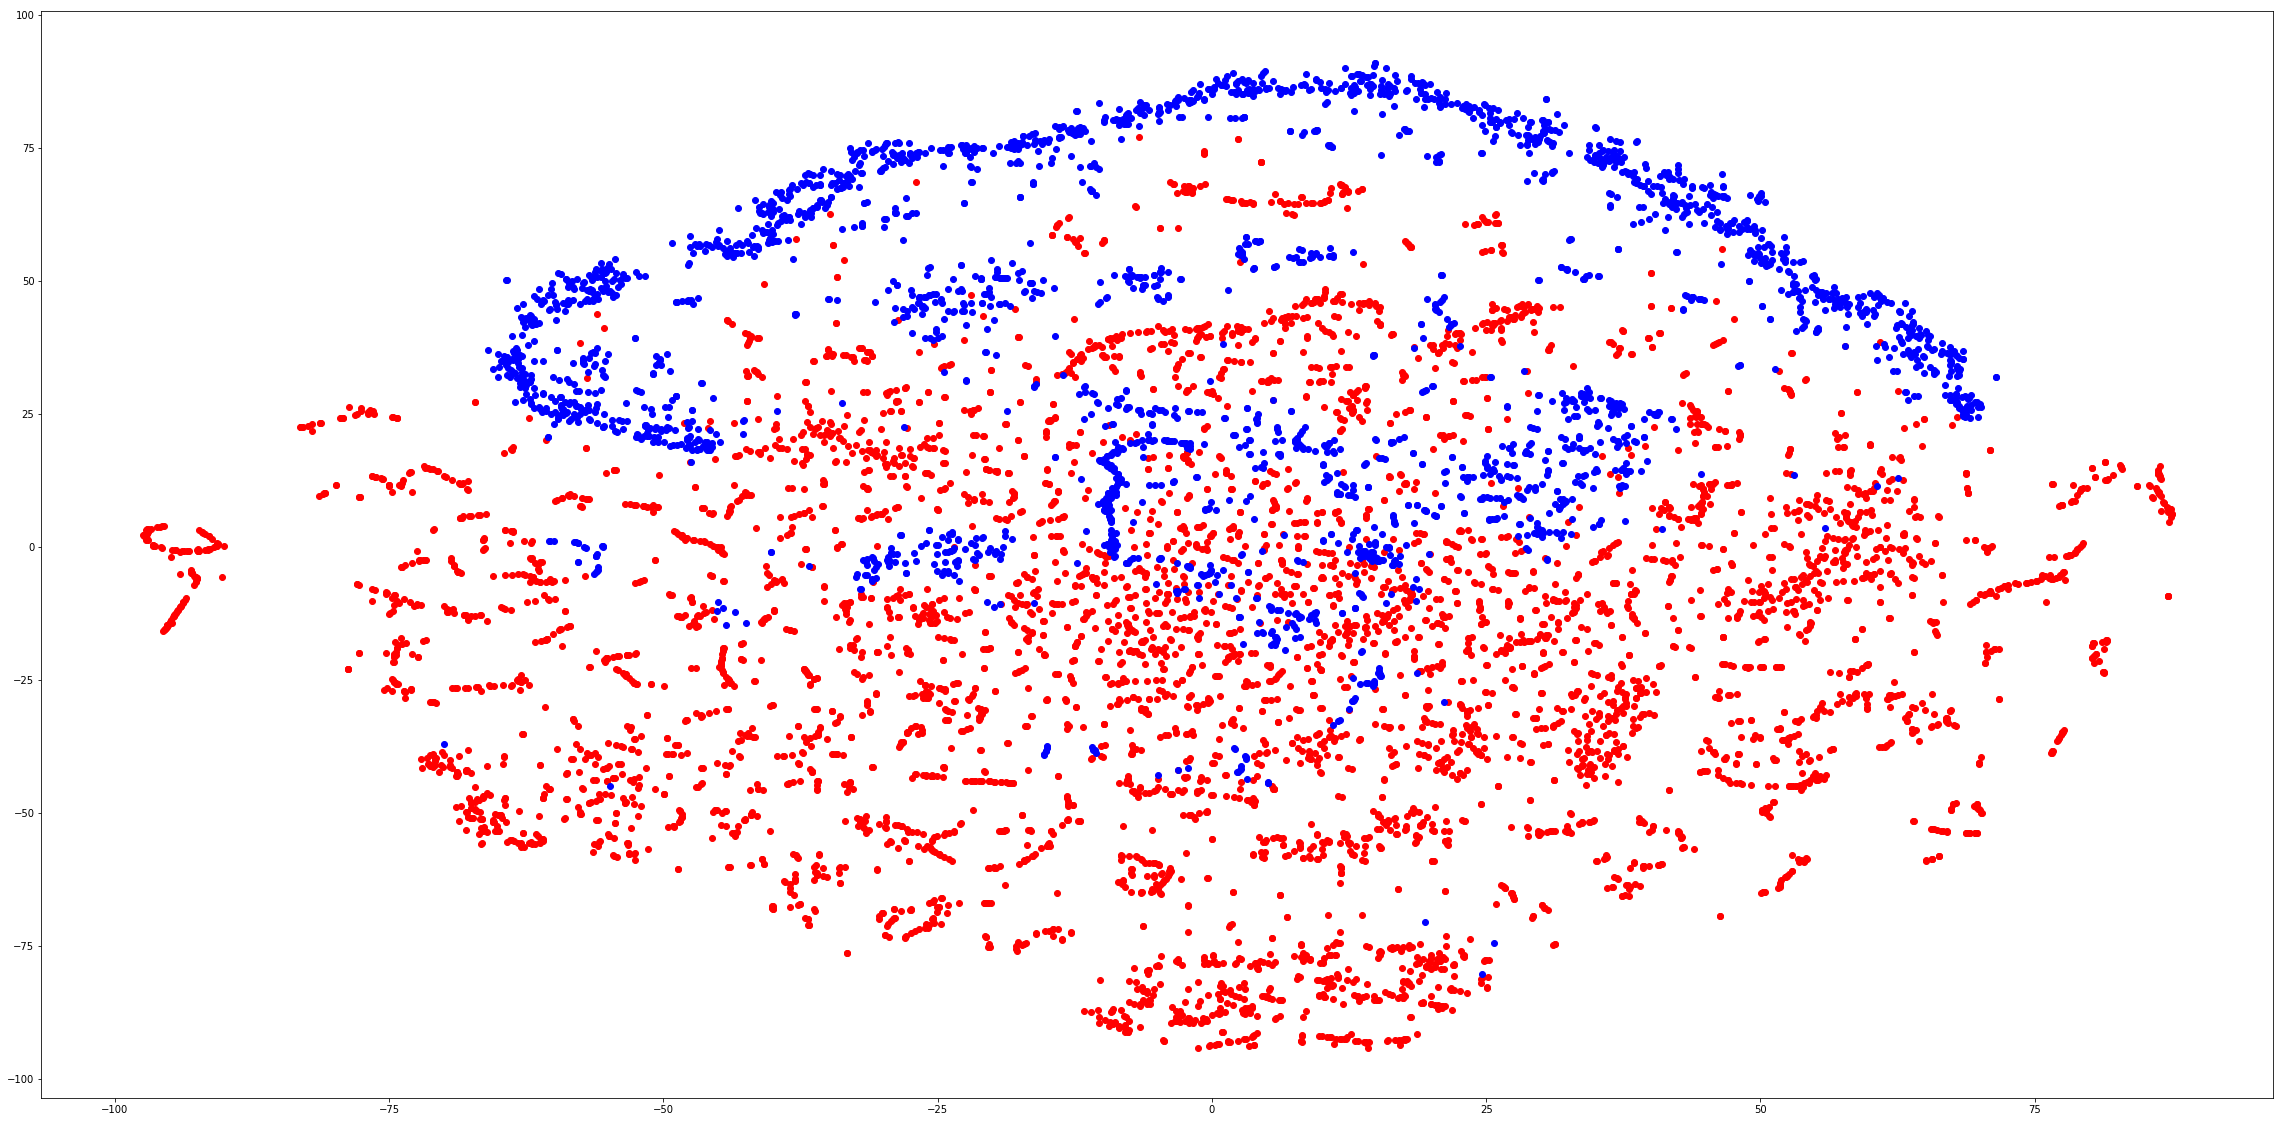

In [83]:
fig#파랑색 = 소프트웨어 , 빨강색 = 악성코드

# 2. 문서안에 있는 단어관계를 T-SNE로 표현

In [84]:
vocab = list(model.wv.vocab) #모델에 있는 단어를 추출.

In [87]:
vocab[0:10]

['GetSystemTimeAsFileTime',
 'GetFileAttributesW',
 'CreateActCtxW',
 'LdrLoadDll',
 'NtAllocateVirtualMemory',
 'NtFreeVirtualMemory',
 'LoadStringW',
 'MessageBoxTimeoutW',
 'NtTerminateProcess',
 'LdrGetProcedureAddress']

In [94]:
vocab_vector = model[vocab] #모든 단어들의 벡터를 추출함.

In [95]:
vocab_vector[0]

array([-3.0563996e-04, -1.7448018e-03, -9.3840808e-03, -4.5342087e-03,
       -1.8260204e-03, -6.7008464e-03, -5.2286354e-03, -5.3271051e-03,
       -4.5592547e-03, -7.4961036e-03,  2.5849279e-03,  2.9373623e-03,
       -8.3505018e-03,  4.4694478e-03, -9.5432606e-03, -9.6523063e-03,
       -6.6037057e-03,  2.3040443e-03,  5.5608442e-03, -3.6387811e-03,
       -7.8549050e-03, -5.3613191e-03,  9.5753021e-05, -8.9740697e-03,
       -6.4388961e-03,  9.8967506e-03,  1.0183996e-03,  4.8621494e-04,
        3.5746130e-03, -5.7736789e-03,  2.7141003e-03,  6.5668453e-03,
       -1.5836429e-04, -4.0695877e-03,  4.7346684e-03, -4.6914672e-03,
       -8.3241519e-03,  1.9366668e-04, -9.9791056e-03, -5.8366782e-03,
        5.0631179e-03, -1.2708256e-03,  1.7154592e-03,  1.2869359e-03,
        3.6020256e-03, -7.6426268e-03,  9.1410419e-03,  4.2744768e-03,
       -1.2361312e-03,  6.2592649e-03], dtype=float32)

In [97]:
len(vocab_vector)#단어들의 종류만큼 개수가 있음.

263

In [98]:
#많은 시간이 소요된다.
tsne = TSNE(n_components=2).fit(vocab_vector)# n_components 차원 수 설정.
datapoint = tsne.fit_transform(vocab_vector)#벡터화된 데이터들을 2차원으로 변환시킨 후 datapoint에 저장한다.

In [141]:
fig = plt.figure()#그림 생성

<Figure size 432x288 with 0 Axes>

In [142]:
fig.set_size_inches(40, 20)#크기 셋팅

In [143]:
ax = fig.add_subplot(1, 1, 1)# 1X1 그리드에 1번째 subplot 생성

In [144]:
datapoint[0]

array([-1.1875877, 12.421158 ], dtype=float32)

In [145]:
df = pd.DataFrame(datapoint, index=vocab, columns=['x', 'y'])

In [146]:
df

,x,y
GetSystemTimeAsFileTime,-1.187588,12.421158
GetFileAttributesW,-1.012447,3.301845
CreateActCtxW,-2.550355,4.150921
LdrLoadDll,2.039579,-0.310903
NtAllocateVirtualMemory,-1.284247,5.259727
NtFreeVirtualMemory,6.223478,4.917066
LoadStringW,-6.655359,-3.370511
MessageBoxTimeoutW,3.356057,-1.114966
NtTerminateProcess,1.245592,-1.802616
LdrGetProcedureAddress,5.122933,0.228763


In [147]:
ax.scatter(df['x'], df['y'])#x y 좌표를 그림.

In [148]:
for word, pos in df.iterrows():#dataframe 을 한줄 씩 읽어서 저장
    ax.annotate(word, pos, fontsize=20)#그림에 좌표와 이름 추가

In [153]:
df.iterrows

<bound method DataFrame.iterrows of                                         x          y
GetSystemTimeAsFileTime         -1.187588  12.421158
GetFileAttributesW              -1.012447   3.301845
CreateActCtxW                   -2.550355   4.150921
LdrLoadDll                       2.039579  -0.310903
NtAllocateVirtualMemory         -1.284247   5.259727
NtFreeVirtualMemory              6.223478   4.917066
LoadStringW                     -6.655359  -3.370511
MessageBoxTimeoutW               3.356057  -1.114966
NtTerminateProcess               1.245592  -1.802616
LdrGetProcedureAddress           5.122933   0.228763
LdrGetDllHandle                  5.542311  -1.833022
NtUnmapViewOfSection            -4.630439  12.744787
SetUnhandledExceptionFilter      3.633774  -8.581640
NtClose                         -7.260605   9.587309
GetSystemMetrics                -6.768871  -9.383340
LdrUnloadDll                     7.445369  -0.816418
SetErrorMode                     7.377852  -9.519814
LoadString

In [149]:
fig.savefig(model_name+'_vocab.png')#저장

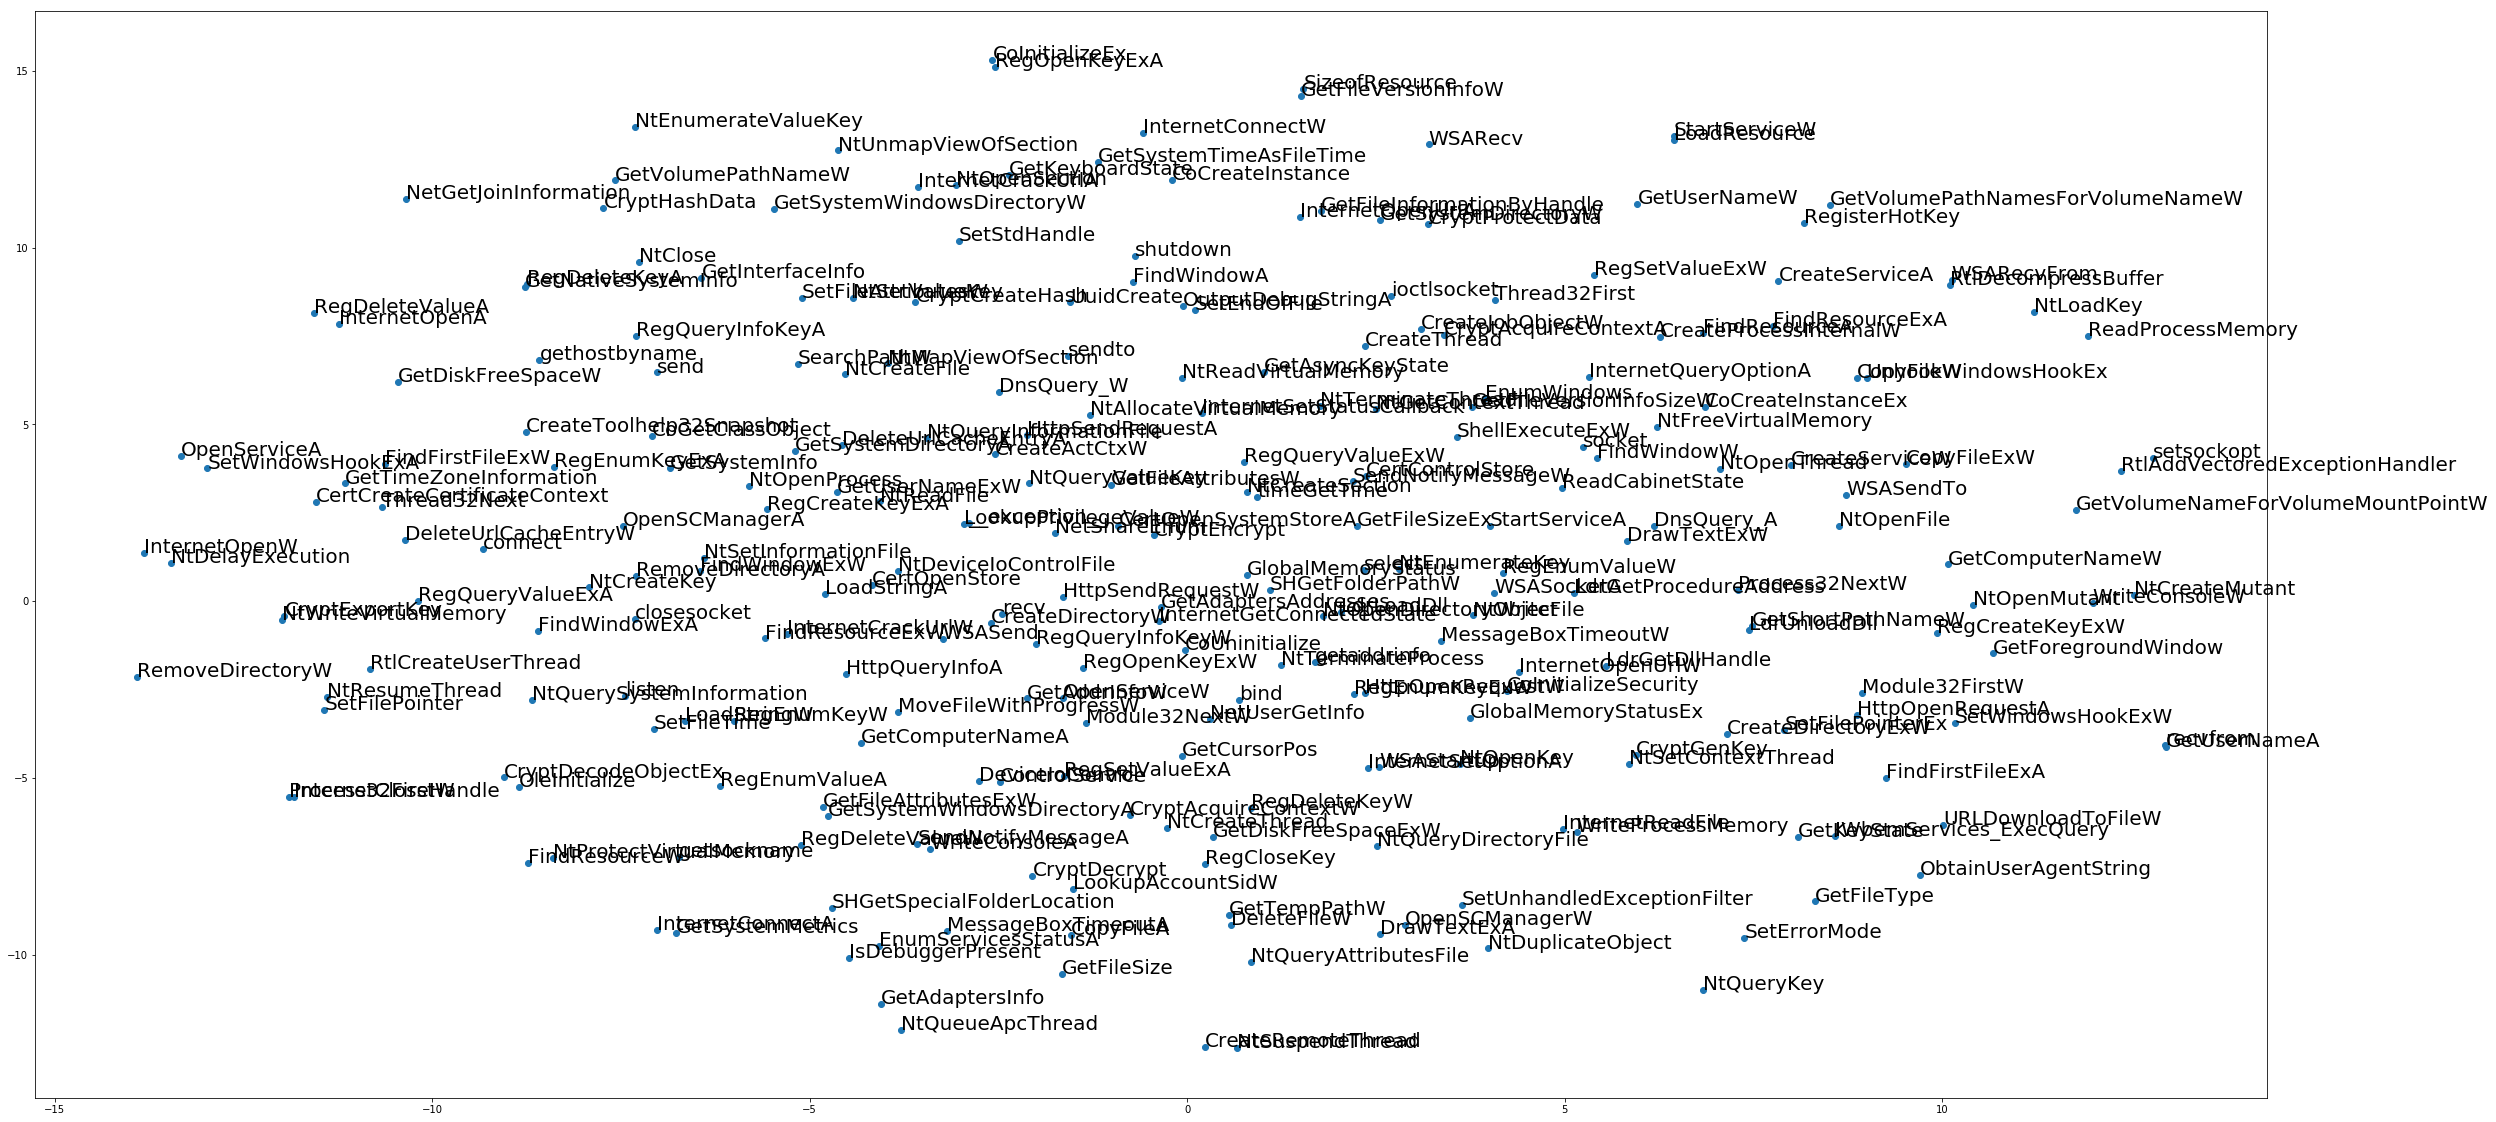

In [150]:
fig